# Web Scraping & NLP - Central London Data Science Project Nights
Instead of relying on excel sheets and database admins to give us the data we need to do our data science, we can take the task into our own hands and collect the data ourselves just by going to webpages.

![see the data](images/neo.gif)
<p style="text-align:center">Stop seeing web pages and start seeing data.</p>

### First lets see what version of python we are on

In [1]:
import sys
if sys.version_info[0] == 3:
    print('Great! Python 3! Lets get on with scraping!')
else:
    print('Yikes! Python 2! This may not work for you! ')

Great! Python 3! Lets get on with scraping!


## Import the libraries for doing our scraping

In [2]:
# 'requests' is what we use to send web-requests (to fetch the html files from websites)
import requests

# beautiful-soup will help us in navigating through the html extract just the text we care about
from bs4 import BeautifulSoup

Now lets decide which page we want to scrap. We'll do https://techcrunch.com/ first. Open the page in your browser (by clicking on the link) to see the visual structure of the page.

In [3]:
WEB_PAGE_TO_SCRAPE_URL = "https://techcrunch.com/"

## 1. Lets send a web request for a page

the code to send a request using the `requests` library is the following:
```python
    requests.get('http://www.google.com')
```
send a request to our `WEB_PAGE_TO_SCRAPE_URL` url and store the output in a new variable named `response`

In [4]:
# send request for the web page
# WRITE YOUR CODE HERE


response = requests.get(WEB_PAGE_TO_SCRAPE_URL)

## 2. Lets look at the text (the html) that was recieved

The text from the request response is spored in the `.text` property of the response:

```python
response_text = response.text

```

Prin out the first 500 characters of the responses text (the html)

In [5]:
# lets look at some of the raw text (the html), more specificly the first 500 characters 
# WRITE YOUR CODE HERE



fetched_html = response.text
fetched_html[:500]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en">\n<head>\n\t<title>TechCrunch - The latest technology news and information on startups</title>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta charset="UTF-8">\n\t\t<meta name="p:domain_verify" content="6189ff68ce30e30f12b40b3b40873027"/>\n\t<meta name="HandheldFriendly" content="True">\n\t<meta name="MobileOptimized" content="320'

### If you can reach Techcrunch.com then use teh following code to load the html from a file

In [6]:
fetched_html = ''
with open('techcrunch.html', 'r') as f:
    fetched_html = f.read()

fetched_html[:500]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en">\n<head>\n\t<title>TechCrunch - The latest technology news and information on startups</title>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta charset="UTF-8">\n\t\t<meta name="p:domain_verify" content="6189ff68ce30e30f12b40b3b40873027"/>\n\t<meta name="HandheldFriendly" content="True">\n\t<meta name="MobileOptimized" content="320'

### The output of the requuest should look like the following: 

```html
'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en">\n<head>\n\t<title>TechCrunch - The latest technology news and information on startups</title>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta charset="UTF-8">\n\t\t<meta name="p:domain_verify" content="6189ff68ce30e30f12b40b3b40873027"/>\n\t<meta name="HandheldFriendly" content="True">\n\t<meta name="MobileOptimized" content="320'
```

## 3. Confirm that the html does look like the above in your internet browser

### *Right click on the web page and click on 'view page source'*
<br/>
<br/>
<br/>
<br/>
<br/>

## 4. Use BeautifulSoup to parse the html into a searchable python object

To be able to extract specific parts of text out of the html we convert it into a python objetc using the `BeautifulSoup` library. To convert raw html into a python object you use the following syntax:

```python
BeautifulSoup(YOUR_RAW_HTML_TEXT, 'html.parser')
```

Use the syntax to convert the text from your `response` and assign it to a varible called `souped_page`

In [7]:
# YOUR CODE GOES HERE


souped_page = BeautifulSoup(fetched_html, 'html.parser')

## 5. Getting specifc elements of the page

Within the pages html there is an element that looks like the following:
```html
<title>TechCrunch - The latest technology news and information on startups</title>
```

You can find this using `BeautifulSoup` using the following syntax:

```python
    souped_page.find('title')
```

This will return the element with the `title` tag (in html the text between < and > is the tag name e.g `<tag name> random text </tag name>`).

Find the title element in our converted page.

In [8]:
# YOUR CODE GOES HERE

souped_page.find('title')

<title>TechCrunch - The latest technology news and information on startups</title>

### Your output should look like:
```html
<title>TechCrunch - The latest technology news and information on startups</title>
```
<br/>
<br/>
<br/>
<br/>
<br/>

## 6. Extract the text from an element
You can extract the actual text of an element by just calling `.getText()` on the element. 

Try extracting just the text from the `title` tag:

In [9]:
# YOUR CODE GOES HERE

souped_page.find('title').getText()

'TechCrunch - The latest technology news and information on startups'

### Your output should look like:
```python
'TechCrunch - The latest technology news and information on startups'
```
<br/>
<br/>
<br/>
<br/>
<br/>

## 7. More advanced element extraction
If your having an easy life all you'll need to do is extract a single element that has a unique tag name i.e what we just did previously. **BUT** that will rarely be the case. If you looked at the raw html you would have seen a lot of tags called `div`. 

`div` are a very common tag that are used becuase they are pretty generic i.e they are the blank slate of html elements. Web developers use them a lot becuase they can easily modify them using additional html attributes like n the following code:


### Here is a bog standard `div` and won't do anything special
<img src="images/element_without_attributes.png" style="width: 600px; margin-left: 0;"/>



### Here is a `div` that has additional attributes that will change the way it looks in the browser
<img src="images/element_with_attributes.png" style="width: 600px; margin-left: 0;"/>



### In the following section we will look at how you can search for elements based on their tag and their attributes:

## 8. Use your browsers 'inspect' to help find the element you want to scrape

Most modern browsers allow you to find the exact code for the part of the webpage you are looking at.

In chrome: right click on the part of the page and click  ***'inspect'***



<img src="images/inspect.png" style="border: red solid 2px;" />



---



### Chrome will highlight the related part of the webpage as you move your mouse over the code

<img src="images/element_find.png" style="border: red solid 2px;" />

## BeautifulSoup query syntax

Take a look at some html that we've fetched from techcrunch.com

<img src="images/bs_syntax.png" style="width: 600px; margin-left: 0;"/>

Using beautiful-soup we could try to find this element by looking for the tag:
```python
souped_page.find('ul')
```
Try to find the `ul` element by running `souped_page.find('ul')`:

**NOTE** : *Dont worry if the output looks long - it prints out the element along with all of its nested elements*

In [10]:
# YOUR CODE GOES HERE

souped_page.find('ul')

<ul class="inline-list social-list sprite-social">
<li class="nav-followus">Follow Us</li><li class="first">
<a class="spricon nosprite icon-facebook" href="https://www.facebook.com/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Facebook</span></a>
</li><li>
<a class="spricon nosprite icon-instagram" href="https://instagram.com/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Instagram</span></a>
</li><li>
<a class="spricon nosprite icon-twitter" href="https://twitter.com/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Twitter</span></a>
</li><li class="youtube nav-aux">
<a class="spricon nosprite icon-youtube" href="http://www.youtube.com/user/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Youtube</span></a>
</li><li class="flipboard nav-aux">
<a class="spricon nosprite icon-flipboard" href="https://flipboard.com/@techcrunch" rel="external" target="_blank"><span class="is-vishidden">Flipboard</spa

## That isn't our element!
The element we wanted looked like:
```html
<ul class="river lc-padding" id="river1">
```
Instead we got:
```html
<ul class="inline-list social-list sprite-social">
```

**The problem** is that there are loads of `ul` elements on this page (fyi `ul` means 'unordered-list').

We need to be more specific, we can search for elements based both on the tag and element attributes like so:
```python
# pass in a dictionary of the attributes you want to search for
souped_page.find('ul', {'class':'river'})
```
Try to find the `ul` element using the `.find('ul', {'class':'river'})` command on our `souped_page` adn asign the out to varible called `element_search`

In [11]:
# YOUR CODE STARTS HERE

element_search = souped_page.find('ul', {'class':'river'})

# YOUR CODE ENDS HERE

# I won't print it all becuase it's quite long
# let's just see if all of the attributes match
element_search.attrs

{'class': ['river', 'lc-padding'], 'id': 'river1'}

### Your output should look like:
```python
{'class': ['river', 'lc-padding'], 'id': 'river1'}
```
<br/>
<br/>
<br/>
<br/>
<br/>

## 9. Getting a list of elements
up until this point we have been using the `.find` command which returns the first match to our search.

We can get all matches by using the `.find_all` command instead.

This will return a list of all of the matching elements.

On the techcruch home page each article is a `li` tag (li stands for list item) with a `class` attribute that is `'river-block '`

Do a `.find_all` for these elements and asign the output to a varible called `article_listings`

In [12]:
# YOUR CODE STARTS HERE
article_listings = souped_page.find_all('li', {'class':'river-block'})

# YOUR CODE ENDS HERE

print('Numer of article:', len(article_listings))

print('Printing article titles \n')

# we know most of these elements has an attribute called 'data-sharetitle' that stores the articles title
# so lets print these out

for a in article_listings:
    if 'data-sharetitle' in a.attrs:
        print(a['data-sharetitle'])

Numer of article: 20
Printing article titles 

Microsoft wants to help developers bring their AI models to the desktop
Google’s Duo video chat app gets video- and voicemail
CBS All Access is ‘doubling down’ on originals, planning expansion to Canada and
This robot can solve a Rubik’s Cube in .38 seconds
Fishbrain, the fishing app and social network, raises $13.5M Series B
47.3 million U.S. adults have access to a smart speaker, report says
Ecobee scores a $61 million Series C with help from Amazon
Geniac, the office as a service, is shutting down after Grant Thornton pulls support
S&P Global snares Kensho for $550 million
Magic Leap raises $461 million in fresh funding from the Kingdom of Saudi Arabia
Amazon launches a low-cost version of Prime for Medicaid recipients
Atomwise, which uses AI to improve drug discovery, raises $45M Series A
Facebook adds video chat to Messenger Lite, its pared-down Android app
Announcing the TechCrunch Hackathon at VivaTech in Paris
Voicera lands $13.5 m

## 10. Your task -  Scrape an article

There is an article at 'https://techcrunch.com/2018/02/25/gobee-bike-throws-in-the-towel-on-france/'.

Your tasked with scraping just the article text i.e the text in the red box. 

Save the scraped text in a varible named `article_text`


<img src="images/page_to_scrape.png" />


# GO!

## **NOTE**: *If you get stuck look at the completed notebook *

In [13]:
# YOUR CODE GOES HERE (MAKE AS MANY NEW CELLS AS YOU LIKE)




In [14]:
# IF YOU CANT REACH TECHCRUNCH.COM USE THE FOLLOWING CODE TO GET THE HTML FROM FILE
backup_article = ''
with open('techcrunch_article.html', 'r') as f:
    backup_article = f.read()

In [15]:
# YOUR CODE GOES HERE




In [16]:
# YOUR CODE GOES HERE




In [17]:
ARTICLE_URL = 'https://techcrunch.com/2018/02/25/gobee-bike-throws-in-the-towel-on-france/'

In [18]:
article_response = requests.get(ARTICLE_URL)

In [19]:
article_soup = BeautifulSoup(article_response.text, 'html.parser')

In [20]:
article_body = article_soup.find('div', {'class':['article-entry']})
article_body

<div class="article-entry text">
<!-- Begin: Wordpress Article Content -->
<img class="" src="https://tctechcrunch2011.files.wordpress.com/2017/08/gobee-2.jpg?w=738"/>
<p id="speakable-summary">Bike-sharing startup <a href="http://gobeebike.fr/en/" rel="noopener" target="_blank">GoBee Bike</a> is giving up and <a href="http://gobeebike.fr/fr/goodbye-fr/" rel="noopener" target="_blank">shutting down</a> in all French cities where it operates. GoBee Bike operates just like Chinese giants Ofo and Mobike. You open the app, you find a bike on the map and you unlock it by scanning a QR code. Once you’re done, you lock it again and leave it there — there’s no dock.</p>
<p>And yet, the startup is blaming vandalism and says that the service would stop immediately. It’s worth noting that users will get a refund on their remaining balances and €15 deposit. This is a nice gesture.</p>
<p>According to the announcement, GoBee Bike managed to attract 150,000 users in Europe who used the service hundr

In [21]:
article_text = article_body.getText().replace('\n', ' ')
article_text

'   Bike-sharing startup GoBee Bike is giving up and shutting down in all French cities where it operates. GoBee Bike operates just like Chinese giants Ofo and Mobike. You open the app, you find a bike on the map and you unlock it by scanning a QR code. Once you’re done, you lock it again and leave it there — there’s no dock. And yet, the startup is blaming vandalism and says that the service would stop immediately. It’s worth noting that users will get a refund on their remaining balances and €15 deposit. This is a nice gesture. According to the announcement, GoBee Bike managed to attract 150,000 users in Europe who used the service hundreds of thousands of times. But the company’s bikes slowly became unusable. 3,200 bikes became dysfunctional, 1,000 bikes were illegally parked in someone’s home. Overall, GoBee Bike had to send someone in 6,500 cases. The startup couldn’t keep up and it became clear that the business model wasn’t scalable if you needed to fix the bikes all the time. A

In [22]:
print(article_body)

<div class="article-entry text">
<!-- Begin: Wordpress Article Content -->
<img class="" src="https://tctechcrunch2011.files.wordpress.com/2017/08/gobee-2.jpg?w=738"/>
<p id="speakable-summary">Bike-sharing startup <a href="http://gobeebike.fr/en/" rel="noopener" target="_blank">GoBee Bike</a> is giving up and <a href="http://gobeebike.fr/fr/goodbye-fr/" rel="noopener" target="_blank">shutting down</a> in all French cities where it operates. GoBee Bike operates just like Chinese giants Ofo and Mobike. You open the app, you find a bike on the map and you unlock it by scanning a QR code. Once you’re done, you lock it again and leave it there — there’s no dock.</p>
<p>And yet, the startup is blaming vandalism and says that the service would stop immediately. It’s worth noting that users will get a refund on their remaining balances and €15 deposit. This is a nice gesture.</p>
<p>According to the announcement, GoBee Bike managed to attract 150,000 users in Europe who used the service hundr

### Your output should look like:
```python
'   Bike-sharing startup GoBee Bike is giving up and shutting down in all French cities where it operates. GoBee Bike operates just like Chinese giants Ofo and Mobike. You open  the app, you find a bike on the map and you unlock it by scanning a QR code. Once you’re done, you lock it again and leave it there — there’s no dock. And yet, the startup is blaming vandalism and says that the service would stop immediately. It’s worth noting that users will get a refund on their remaining balances and €15 deposit. This is a nice gesture. According to the announcement, GoBee Bike managed to attract 150,000 users in Europe who used the service hundreds of thousands of times. But the company’s bikes slowly became unusable. 3,200 bikes became dysfunctional, 1,000 bikes were illegally parked in someone’s home. Overall, GoBee Bike had to send someone in 6,500 cases. The startup couldn’t keep up and it became clear that the business model wasn’t scalable if you needed to fix the bikes all the time. As a user, it also felt like you couldn’t unlock most of the bikes because the lock battery was dead most of the time. GoBee Bike first announced that it would stop operating in Brussels, Lille and Reims. The startup also exited the Italian market. And now, users in Paris and Lyon can’t access the service either. The company is still operating in its home city Hong Kong. In Paris in particular, there were four different free-floating bike companies — Ofo, Mobike, Obike and GoBee Bike. GoBee Bike is clearly underfunded compared to those giants. According to CrunchBase, GoBee Bike has raised $9 million. Ofo and Mobike have raised over $2 billion combined. And you can feel it as a user. While Ofo has been operating in Paris since mid-December, all rides have been free for the past two and half months. Mobike has been around for a month and rides are free as well. Even Obike gave you 50 free rides when you signed up. It’s hard to compete with free.  '
```
<br/>
<br/>
<br/>
<br/>
<br/>

<h1 style="text-align:center">Now you should see all of the internet as scrapable data </h1>
![new view](images/matrix.gif)

# Lets do some NLP now!

In [23]:
# textblob has a pre-trained sentiment analysis model that we can use
from textblob import TextBlob

## 1. Using TextBlob to get sentiment scores

Textblob makes it very easy to get sentiment scores form text. 

We use the following code to convert text into a TextBlob obejct:

```python
my_text_blob_object = TextBlob('This is some test text')

```

The sentiment scores are stored as a `.sentiment` property on the TextBlob object:

```python
my_text_blob_object.sentiment
```

This will return a value pair representing the sentiment scores for the text.

Here is a section of the TextBlob documentation that explains what the values in the value pair mean:

From https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment

> TextBlob.sentiment

> Return a tuple(value pair) of form `(polarity, subjectivity )` where polarity is a float(number) within the range `[-1.0, 1.0]` and subjectivity is a float(number) within the range `[0.0, 1.0]` where 0.0 is very objective and 1.0 is very subjective.

### Your task

Create a TextBlob object using your `article_text` that you scraped and print out out the sentiment scores

In [24]:
# YOUR CODE GOES HERE

processed_text = TextBlob(article_text)

print(processed_text.sentiment)

Sentiment(polarity=0.09011111111111111, subjectivity=0.41522222222222227)


### Your output should look like (may not be exact):

Sentiment(polarity=0.09011111111111111, subjectivity=0.41522222222222227)
<br/>
<br/>
What these scores say is that the text is fairly subjective (opinionated) but very neutral in polarity (not phrased in a negative or positive way)
<br/>
<br/>
<br/>

## 2. What are the more subjective (emotional) sentences?

We have just gotten the sentiment scores for the whole text, but we can split up teh text and analyse the sentiment of each sentence.

```python
# split up text into sentences
sentences = article_text.split('.')

# loop for each sentence
for sentence in sentences:
    
    # get sentiment score for sentence
    sentence_sentiment = TextBlob(sentence).sentiment
    
    # if the subjectivity(opinionated) score is greater than 0.5 then 
    # print out the sentence with the score    
    if  sentence_sentiment.subjectivity > 0.5:
        print(sentence, sentence_sentiment.subjectivity)
```


In [25]:
# WRITE YOUR CODE HERE OR COPY AND PASTED FROM ABOVE


sentences = article_text.split('.')

for sentence in sentences:
    
    sentence_sentiment = TextBlob(sentence).sentiment
    
    if  sentence_sentiment.subjectivity > 0.5:
        print(sentence, sentence_sentiment.subjectivity)

 This is a nice gesture 1.0
 Mobike has been around for a month and rides are free as well 0.8
 Even Obike gave you 50 free rides when you signed up 0.8
 It’s hard to compete with free 0.6708333333333334


## 3. Advanced sentiment ploting - Can we plot the words by their sentiment? 

In [26]:
# import ploting library 
import matplotlib.pyplot as plt

# draw plot in notebook
%matplotlib inline

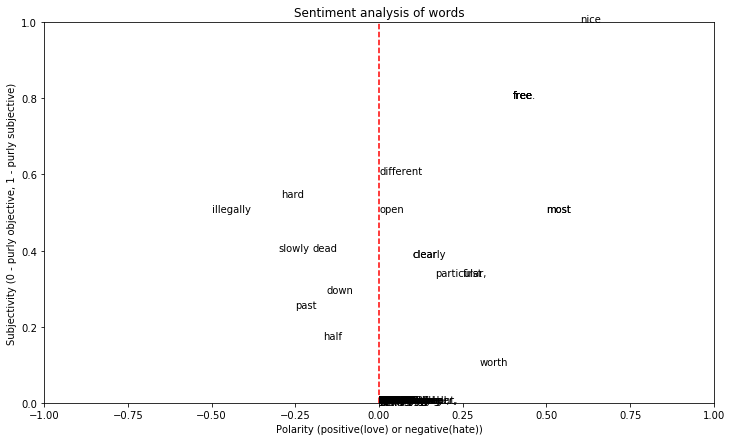

In [27]:
# get all word indevidually by splitting on every space
words = article_text.split(' ')

# big it a big plot
plt.figure(figsize=(12,7))

# for each word draw the text on teh char using the sentiment score as the x and y coordinates
for word in words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words')
plt.xlabel('Polarity (positive(love) or negative(hate))')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

# Donzo